# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Day 2 APIs, Activity 5 for reference

url= f"http://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid={weather_api_key}"
units = "imperial"


#Build partial query URl
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(url)
weather =response.json()

pprint(weather)
#response.text


{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': 35, 'lon': 139},
 'dt': 1588034432,
 'id': 1851632,
 'main': {'feels_like': 285.33,
          'humidity': 69,
          'pressure': 1017,
          'temp': 286.48,
          'temp_max': 286.48,
          'temp_min': 286.48},
 'name': 'Shuzenji',
 'sys': {'country': 'JP',
         'id': 2019346,
         'sunrise': 1588017382,
         'sunset': 1588065982,
         'type': 3},
 'timezone': 32400,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 209, 'gust': 2.24, 'speed': 0.89}}


In [4]:
#Day 2 APIs, Activity 5  and Activity 8 for reference

number = 0 

#Set up lists to hold response info
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []

for city in cities: 
    try:
        response = requests.get(url + '&q=' + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp']-273)
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f"Success {city}")
    except:
        print(f"Unknown Data for:{city}")
        number = number + 1
        
        
print(response)
print(city_name)
print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)
print(lat)
print(lng)
print(len(city_name))
print(len(cities))



Success huari
Success punta arenas
Success hilo
Success muskegon
Success alofi
Unknown Data for:mys shmidta
Success puerto ayora
Success praia da vitoria
Success bredasdorp
Success hofn
Success busselton
Success leshukonskoye
Unknown Data for:belushya guba
Success kieta
Success guerrero negro
Success castro
Success atuona
Success kapaa
Success khatanga
Unknown Data for:utiroa
Unknown Data for:kamenskoye
Success lodwar
Success dikson
Success new norfolk
Success batagay-alyta
Unknown Data for:amderma
Success mwinilunga
Success mar del plata
Success saint anthony
Success zubtsov
Success mataura
Success cape town
Success salalah
Success xining
Success mabaruma
Success trincomalee
Success albany
Success vaini
Success herat
Success dibulla
Success can tho
Success lompoc
Success petropavlovsk-kamchatskiy
Success mehamn
Success rikitea
Success port elizabeth
Success fredericksburg
Success bluff
Success chokurdakh
Success mnogovershinnyy
Success sabang
Success torbay
Success nelson bay
Success 

Success arraial do cabo
Success yaransk
Success maniitsoq
Success richards bay
Success eyl
Success fukue
Success grand gaube
Success bangaon
Success rach gia
Success matara
Success kharp
Success manicore
Success moussoro
Unknown Data for:nguiu
Success kendari
Success garissa
Success isangel
Success snasa
Success sept-iles
Success ejea de los caballeros
Success lasa
Success codrington
Success ahipara
Success brae
Success lazaro cardenas
Success waipawa
Unknown Data for:falealupo
Success lieksa
Success cooma
Success gallup
Success mana
Success corrales
Success zalantun
Success bourg-en-bresse
Success kandi
Unknown Data for:attawapiskat
Success boa vista
Success wanlaweyn
Success baljevac
Success souillac
Success tobol
Success bogense
Success wenzhou
Success campbellsville
Success jardim
Success ust-ilimsk
Success columbus
Success vanimo
Success road town
Success williamsport
Success egvekinot
Success verkhoyansk
Success kenora
Success baykit
Success pombia
Success smidovich
Success gazim

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Day 2 APIs, Activity 5 for reference

#Create Data Frame
response_df= pd. DataFrame({
        'City':city_name,
        'Temperature': temp,
        'Humidity': humidity,
        'Cloudiness': cloudiness,
        'Wind Speed': wind_speed,
        'Latitude': lat,
        'Longitude': lng})

response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Huari,4.60,29,100,2.18,-9.33,-77.23
1,Punta Arenas,-0.85,100,20,1.50,-53.15,-70.92
2,Hilo,25.06,58,1,4.10,19.73,-155.09
3,Muskegon,9.61,93,90,2.10,43.30,-86.13
4,Alofi,27.15,88,75,3.60,-19.06,-169.92


In [6]:
#Export the city data into a .csv. 
pd.DataFrame.to_csv(response_df, 'response.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Huari,4.60,29,100,2.18,-9.33,-77.23
1,Punta Arenas,-0.85,100,20,1.50,-53.15,-70.92
2,Hilo,25.06,58,1,4.10,19.73,-155.09
3,Muskegon,9.61,93,90,2.10,43.30,-86.13
4,Alofi,27.15,88,75,3.60,-19.06,-169.92


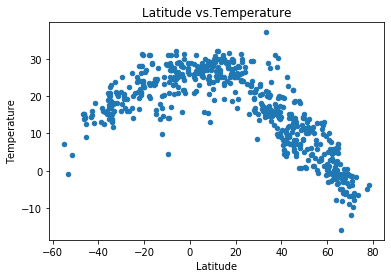

<Figure size 432x288 with 0 Axes>

In [8]:
#plt.scatter(response_df["Latitude"], response_df['Temperature'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Temperature", title="Latitude vs.Temperature")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [9]:
#As distance from the equator increases (either north or south), tempteratures decrease as well.
#This graph shows that temperatures peak at the equator.

#### Latitude vs. Humidity Plot

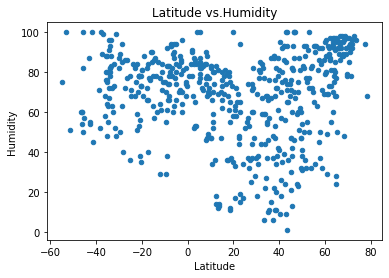

<Figure size 432x288 with 0 Axes>

In [10]:
#plt.scatter(response_df["Latitude"], response_df['Humidity'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Humidity", title="Latitude vs.Humidity")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [11]:
#Humidity looks consistent regardless of the point of latitude.  

#### Latitude vs. Cloudiness Plot

In [13]:
#There doesn't seem to be a correlation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

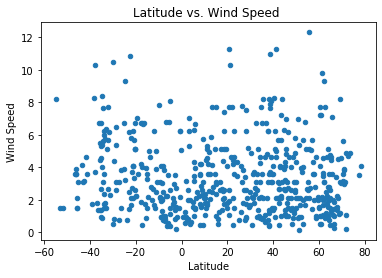

<Figure size 432x288 with 0 Axes>

In [14]:
response_df.plot(kind = "scatter", x="Latitude", y="Wind Speed", title="Latitude vs. Wind Speed ")
plt.show()

plt.savefig("lat_temp_plot.png", bbox_inches='tight', dpi=600)

In [15]:
#Wind speed is consistent regardless of latitude.

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem=response_df[response_df["Latitude"]>=0]
south_hem=response_df[response_df["Latitude"]<=0]
                

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

2      23.213996
3      11.715658
6      13.945077
8       1.495455
10      1.178361
         ...    
550    17.969739
552    11.730293
553    23.833550
554    15.759834
556    25.570253
Name: Latitude, Length: 383, dtype: float64
The r-squared is: 0.801695361956649


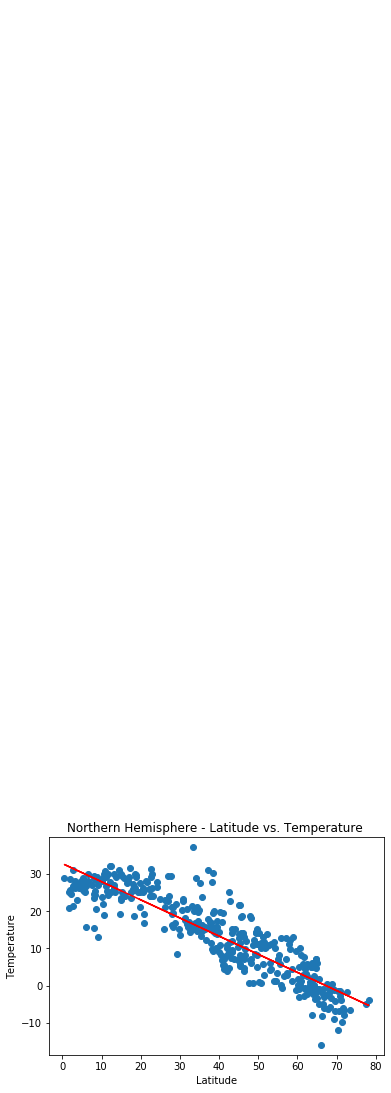

In [17]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(15,260),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      24.635825
1      11.869032
4      21.801026
5      27.138489
7      17.293899
         ...    
543    18.165024
549    16.947197
551    17.282245
555    24.886382
557    24.988354
Name: Latitude, Length: 175, dtype: float64
The r-squared is: 0.4393414216786333


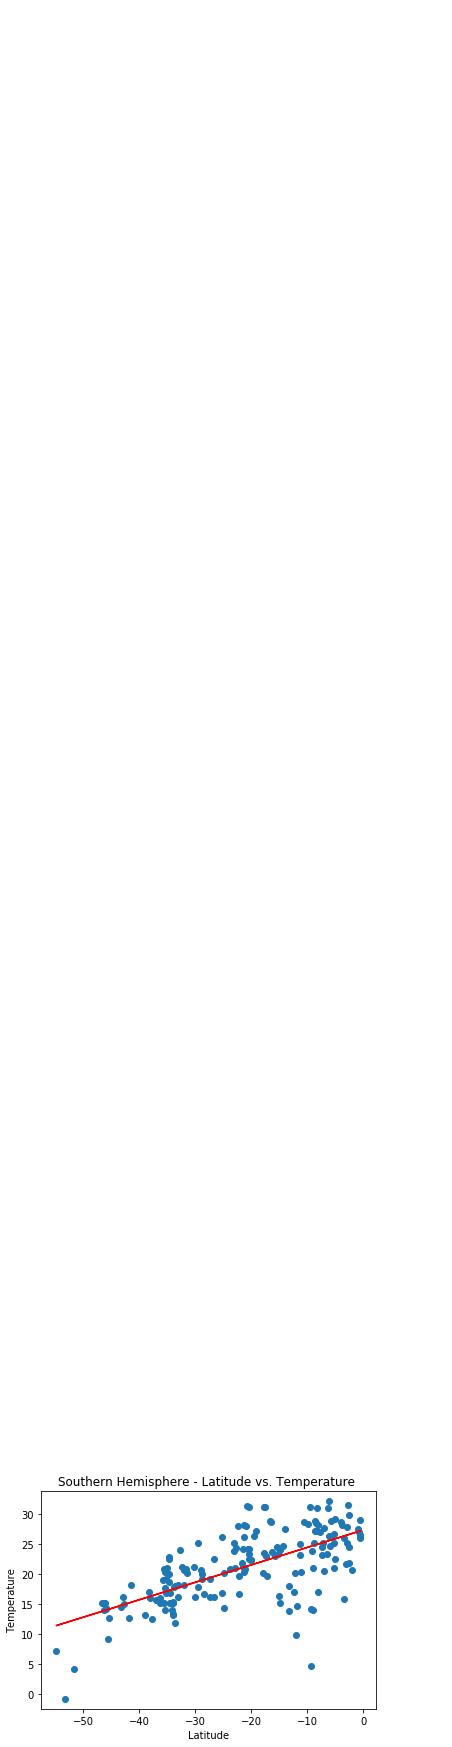

In [18]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = south_hem["Latitude"]
y_values = south_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(-10,280),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


In [19]:
#Northern hemisphere graph shows that the temperature is hottest at the equator(point 0 latitude) and decreases as you move
#farther away. The southern hemisphere graph shows the opposit correlation with temperatures starting cold and increasing as 
#you move closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

2      60.791084
3      67.394193
6      66.113913
8      73.263312
10     73.445409
         ...    
550    63.802685
552    67.385789
553    60.435295
554    65.071759
556    59.437965
Name: Latitude, Length: 383, dtype: float64
The r-squared is: 0.055634667444060454


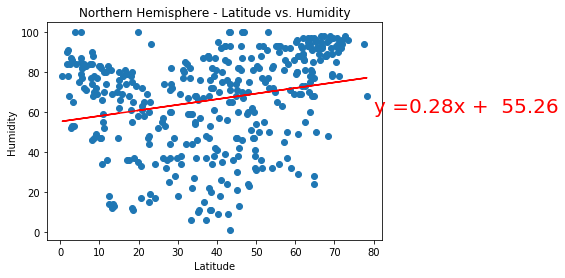

In [20]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(80,60),fontsize=20,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      74.733401
1      71.218505
4      73.952937
5      75.422423
7      72.712055
         ...    
543    72.951889
549    72.616602
551    72.708846
555    74.802383
557    74.830458
Name: Latitude, Length: 175, dtype: float64
The r-squared is: 0.005247836228624441


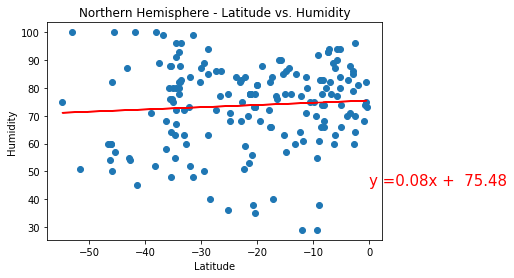

In [22]:
x_values = south_hem["Latitude"]
y_values = south_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [23]:
#There is no correlation between latitude and humidy in the norther hemisphere. 
#There may be a slight correlation between humidity and latitude in the southern hemisphere, getting more humid as you
#get closer to the equator. If there is a slight correlation, I don't think it would be statistically significant. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      49.115492
3      54.927378
6      53.800508
8      60.093225
10     60.253502
         ...    
550    51.766225
552    54.919981
553    48.802335
554    52.883231
556    47.924511
Name: Latitude, Length: 383, dtype: float64
The r-squared is: 0.01624988910165909


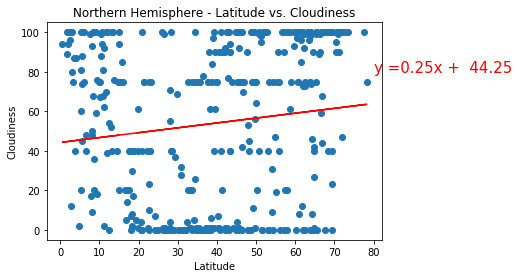

In [24]:
x_values = north_hem["Latitude"]
y_values = north_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(80,80),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      56.452131
1      43.669674
4      53.613854
5      58.957866
7      49.101197
         ...    
543    49.973391
549    48.754070
551    49.089529
555    56.702996
557    56.805092
Name: Latitude, Length: 175, dtype: float64
The r-squared is: 0.009397864866671917


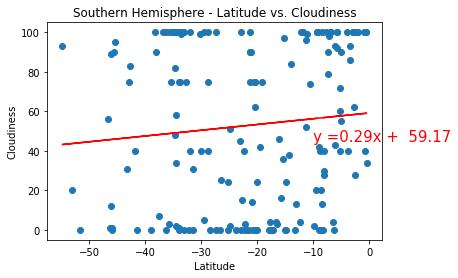

In [25]:
x_values = south_hem["Latitude"]
y_values = south_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(-10,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [26]:
#The graphs don't show any correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2      3.254282
3      3.241076
6      3.243636
8      3.229338
10     3.228974
         ...   
550    3.248259
552    3.241093
553    3.254993
554    3.245721
556    3.256988
Name: Latitude, Length: 383, dtype: float64
The r-squared is: 2.7263836356589693e-05


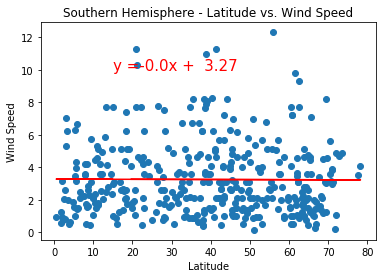

In [27]:
x_values = north_hem["Latitude"]
y_values = north_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      3.047667
1      4.714767
4      3.417838
5      2.720866
7      4.006383
         ...   
543    3.892630
549    4.051656
551    4.007905
555    3.014949
557    3.001633
Name: Latitude, Length: 175, dtype: float64
The r-squared is: 0.050531628434495476


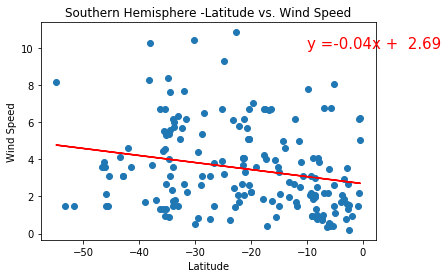

In [28]:
x_values = south_hem["Latitude"]
y_values = south_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere -Latitude vs. Wind Speed")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

In [29]:
#Windspeed looks to be relatively consistent regardless of latitude in both of these graphs.

In [ ]:
#Observable trends:
#1) We can statistically show that temperatures are hotter as you near the equator.
#2)There's not a good way to predict cloudiness as our graphs shoed no correlation. 
#3) There is also no correlation between wind a latitude. 